### 작업경로
- 절대경로
    - (r'C:\Users\USER\Desktop\...\) r -> 너는 경로다 
- 상대경로
    - (. : 현재 , .. : 상위 디렉토리)


In [209]:
import os
print(os.getcwd())
print(os.path.dirname(os.path.realpath('12-28')) )

c:\Users\USER\Desktop\SESAC\23.12.28
C:\Users\USER\Desktop\SESAC\23.12.28


glob.glob --> glob 폴더에서 glob.py를 실행하자



from glob import glob 이랑 같은 말


glob -> 디렉토리 모든경로를 포함해서 보여주는 편


os.listdir -> 파일명만 보여줌

In [210]:
import os
print(os.listdir(os.getcwd()))

['12-28.ipynb', 'calendar_2024.png', 'cat.jpg', 'cat_flip_lr.jpg', 'flower01.jpg', 'flower02.jpg', 'flower03.jpg', 'flower04.jpg', 'flower06.jpg', 'lines.html', 'RubikDoodleShadow-Regular.ttf']


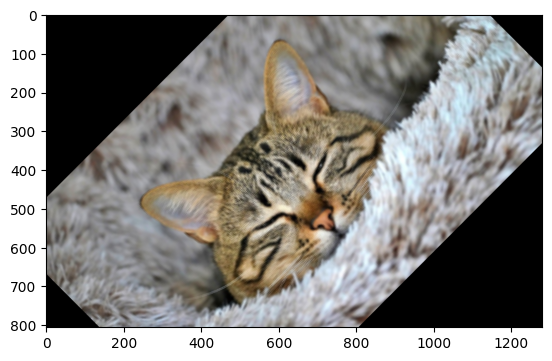

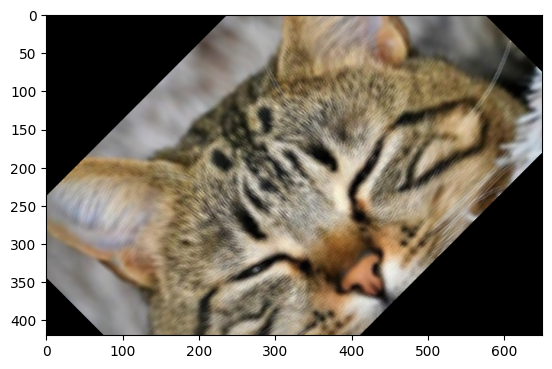

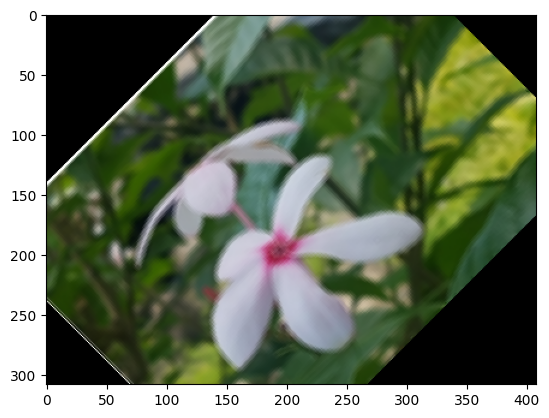

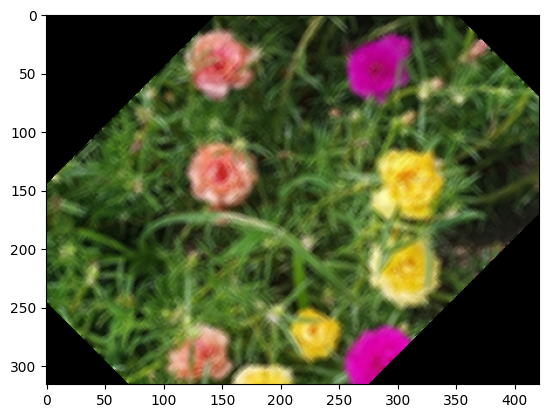

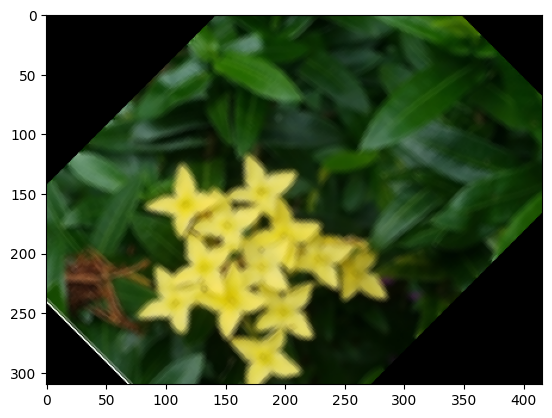

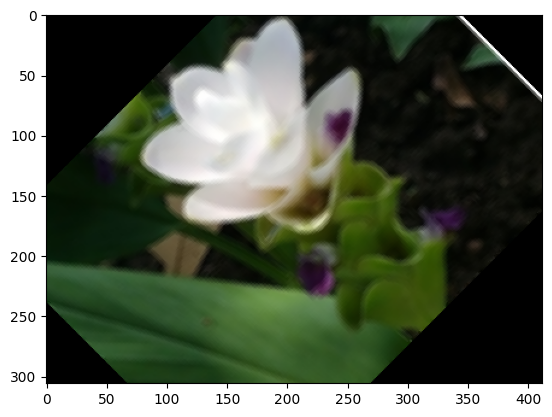

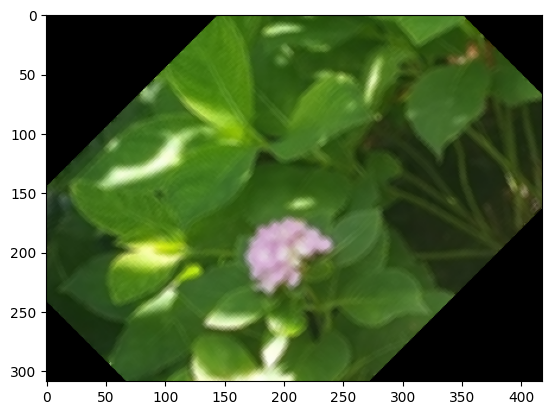

In [211]:
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter
from glob import glob

fileList=glob('./*.jpg')
fileList
for file in fileList:
    img=Image.open(file)
    img=img.filter(ImageFilter.BLUR)
    img=img.rotate(45)
    plt.imshow(img)
    plt.show()
    


cat.jpg
JPEG
(1280, 806)
1280
806
RGB


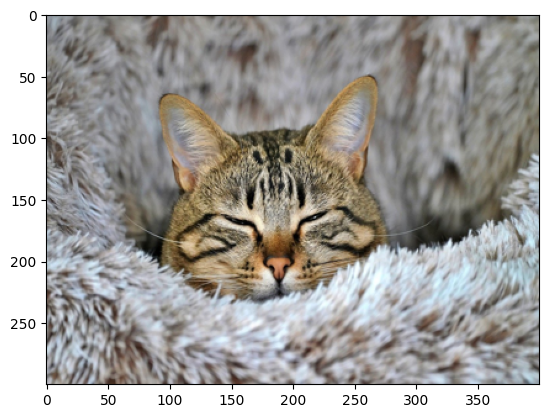

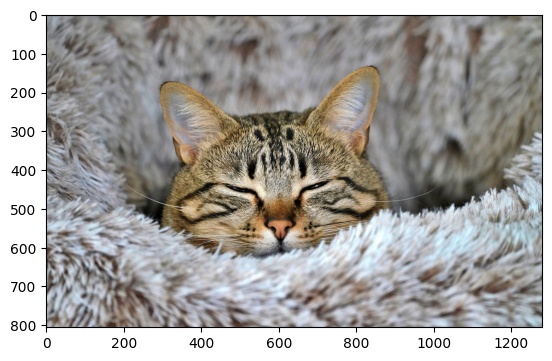

In [212]:
img=Image.open('cat.jpg')
print(img.filename)
print(img.format)
print(img.size)
print(img.width)
print(img.height)
print(img.mode)
img_resized=img.resize((400,300))
plt.imshow(img_resized)
plt.show()
plt.imshow(img)
plt.show()


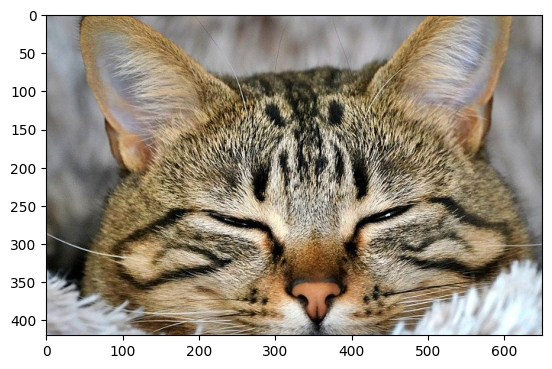

In [213]:
# 100,70 160,160
img_crop=img.crop((250,180,900,600))  # 박스 맨 왼쪽위 좌표 오른쪽 아래 좌표
plt.imshow(img_crop)
plt.show()

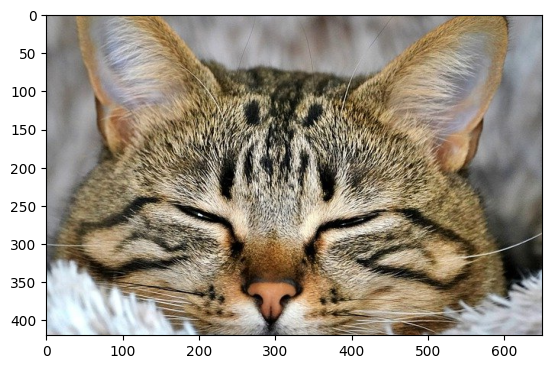

In [214]:
img_crop_fl_lr=img_crop.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(img_crop_fl_lr)
plt.show()

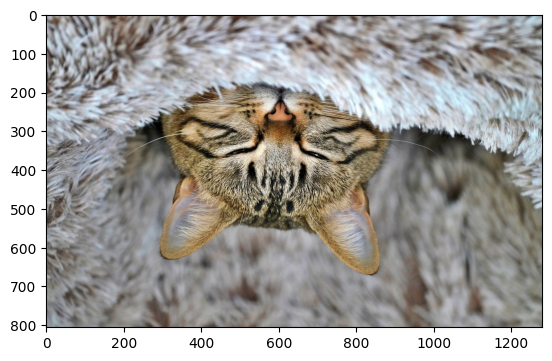

In [215]:
img_crop_fl_tb=img.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(img_crop_fl_tb)
plt.show()

In [216]:
img_crop_fl_lr.save('cat_flip_lr.jpg')

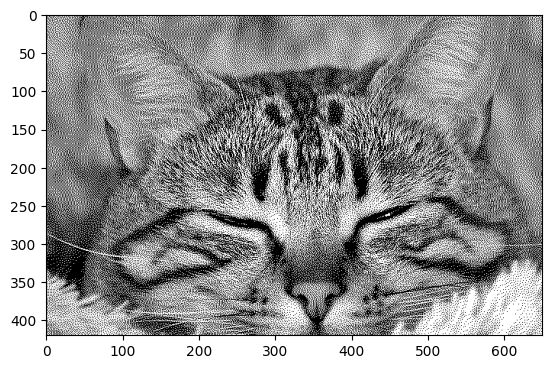

In [217]:
img=img_crop
img
img_gray=img.convert('1')
# img_gray=img.convert('CMYK')
plt.imshow(img_gray)
plt.show()

#### PIL 이미지 필터
- BLUR(BoxBlur(),GaussianBlur(),BLUR)
- MedianFilter(),MinFilter(),MaxFilter()
- CONTOUR
- DETAIL
- EDGE_ENHANCE,EDGE_ENHANCE_MORE
- EMBOSS
- FIND_EDGES
- SHARPEN
- SMOOTH,SMOOTH_MORE


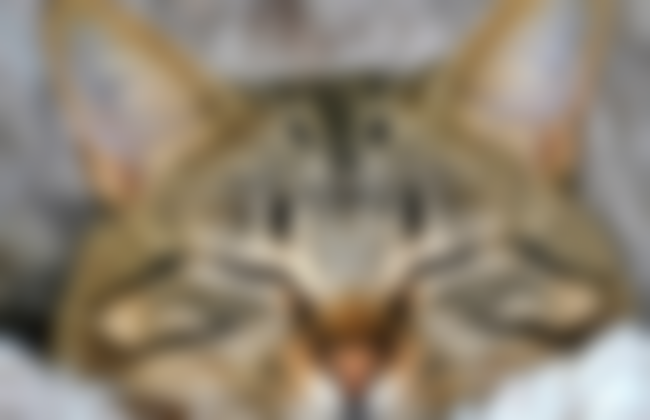

In [218]:
img_blur=img.filter(ImageFilter.GaussianBlur(10))
img_blur

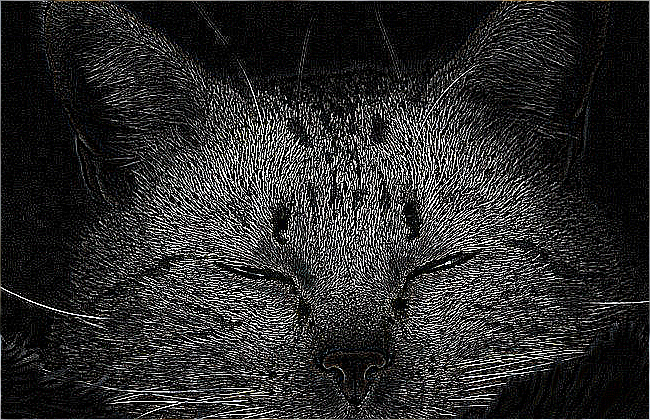

In [219]:
img_edgedetect=img.filter(ImageFilter.FIND_EDGES)
img_edgedetect

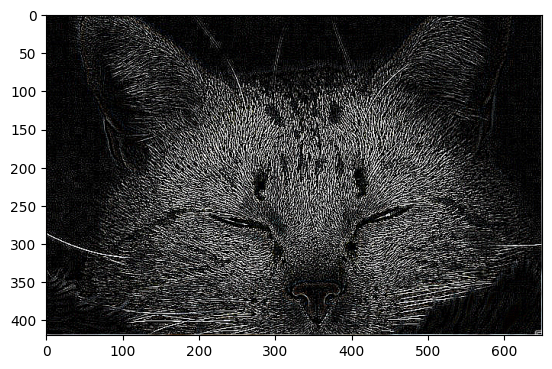

In [220]:
from PIL import Image,ImageDraw,ImageFont
img=img_edgedetect
width,height=img.size
draw=ImageDraw.Draw(img)
text='고양이'
font=ImageFont.truetype('RubikDoodleShadow-Regular.ttf',30)

margin=10
x=width-margin
y=height-margin
draw.text((x,y),text,fill='white',font=font,font_size=18)
plt.imshow(img)
plt.show()

In [221]:
# !pip show pillow
# !pip install --upgrade Pillow

In [222]:
import calendar
year=2024
cal=calendar.calendar(year)
print(cal)
from PIL import ImageDraw,ImageFont

img_width,img_height= 800,600
background_color=(255,255,255)
img= Image.new('RGB',(img_width,img_height),color=background_color)
draw=ImageDraw.Draw(img)

font=ImageFont.load_default()
text_color=(0,0,0)

x,y=10,10
draw.text((x,y),cal,fill=text_color,font=font)
img.save(f'calendar_{year}.png') 

                                  2024

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7                1  2  3  4                   1  2  3
 8  9 10 11 12 13 14       5  6  7  8  9 10 11       4  5  6  7  8  9 10
15 16 17 18 19 20 21      12 13 14 15 16 17 18      11 12 13 14 15 16 17
22 23 24 25 26 27 28      19 20 21 22 23 24 25      18 19 20 21 22 23 24
29 30 31                  26 27 28 29               25 26 27 28 29 30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7             1  2  3  4  5                      1  2
 8  9 10 11 12 13 14       6  7  8  9 10 11 12       3  4  5  6  7  8  9
15 16 17 18 19 20 21      13 14 15 16 17 18 19      10 11 12 13 14 15 16
22 23 24 25 26 27 28      20 21 22 23 24 25 26      17 18 19 20 21 22 23
29 30                     

## For 이해하기



In [223]:
import random
random.random()

0.7746533827443292

In [224]:
for i in range(6):
    num=random.randrange(1,46) # 복원 추출
    print(num,end='/')


38/38/40/21/43/30/

In [225]:
import random

# 1부터 46까지의 숫자 리스트 생성
numbers = list(range(1, 47))

# 비복원 추출 (예: 6개의 숫자 추출)
sample = random.sample(numbers, 6)
print(sample)


[11, 30, 23, 40, 46, 31]


##### enumerate -> index와 값을 두개 내보내줌

In [226]:
person='소라, 태민, 미나, 성우, 지연, 준호'
member_List=person.split(',')
dayList='월,화,수,목,금,토,일'.split(',')
for idx,day in enumerate(dayList):
    memRan=random.choice(member_List)
    print(f'{idx} {day}요일  {memRan}')

0 월요일   성우
1 화요일   미나
2 수요일   태민
3 목요일   준호
4 금요일   준호
5 토요일   미나
6 일요일   지연


#### ZIP
##### enumerate와 유사하게 두개의 값을 넘겨줄수있다

In [227]:
nameList='''소라, 태민, 미나, 성우, 지연, 준호'''.split(',')
dayList='''월/화/수'''.split('/')

for name,day in zip(nameList,dayList):
    print(name,day)
    print('-'*50)

소라 월
--------------------------------------------------
 태민 화
--------------------------------------------------
 미나 수
--------------------------------------------------


In [228]:
nameList,dayList='''소라, 태민, 미나, 성우, 지연, 준호'''.split(','),'''월/화/수'''.split('/')
x=nameList,dayList
type(x)


tuple

In [229]:
# 스칼라 벡터(=list) array  텐서

a=1   #스칼라  
a=[1] # 벡터 (=리스트,방향과 크기를 갖고있음)
a=[[1,2,3], # array =[list]
    [2,3,4]]
a=[             #tensor=[array]
    [
        [1,2,3],
        [2,3,4]
    ]
]

#### 리스트와 array의 차이는
- array는 안에 들어가는게 다 똑같아야함
---
#### 리스트(List)
- 파이썬의 내장 데이터 구조로, 여러 가지 데이터 유형을 포함할 수 있습니다.
- 다양한 유형의 데이터를 단일 리스트 안에 저장할 수 있습니다.
- 크기를 동적으로 조절할 수 있습니다. 
- 요소를 추가하거나 제거하는 데 편리합니다.
- 리스트의 요소들은 <span style="color:orange"> **각기 다른 데이터 유형일 수 있습니다.** </span>
- 요소 삭제시 del 리스트[인덱스] or  리스트.remove(데이터)

---

#### 배열(Array)
- 배열은 NumPy 라이브러리의 핵심 데이터 구조 중 하나입니다.
- <span style='color:orange'> 동일한 데이터 유형의 요소들을 포함합니다. </span>
- 주로 숫자 데이터에 많이 사용됩니다.
- 고정된 크기를 가지며, 크기를 변경하기 어렵습니다.
- <span style= 'color:orange'> 벡터 및 행렬과 같은 수학적 연산을 위해 최적화되어 있습니다.</span>

In [230]:
a=[1,2,3]
print(a+[3]) # 리스트는 +(추가) *(반복)만 가능

aNew=[] #이 방법으로 더하게끔 할수는 있다
for i in a:
    aNew.append(i+3)
aNew

[1, 2, 3, 3]


[4, 5, 6]

In [231]:
import numpy as np 
a=np.array(a)
a+3,a*3


(array([4, 5, 6]), array([3, 6, 9]))

#### 텐서,리스트,어레이 정리

[3,4,5] => a[0] =3 



[[3,4,5]] => a[0] => [3,4,5] , a[0][0]=3



[[[3,4,5]]] => a[0]=[[3,4,5]] ,a[0][0]=[3,4,5],a[0][0][0]=3

408 308
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(308, 408, 3)


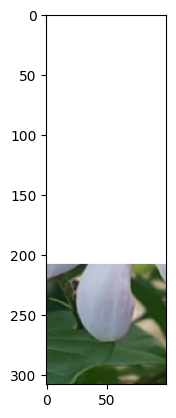

In [232]:
file='C:\\Users\\USER\\Desktop\\SESAC\\23.12.28\\flower01.jpg'
#  file=f'C:\Users\USER\Desktop\SESAC\23.12.28\flower01.jpg'
#  윈도우에서 역슬래쉬 \는 이스케이프 문자(특수제어기능으로 인지)하기에
#  r을 붙여 디렉토리 구분자로 명확하게 설정
file
from PIL import Image
img=Image.open(file)
w,h=img.size #너비 , 높이    # 이  자료는 행이 308개 열이 408개
print(w,h)
print(type(img))


import numpy as np ## 이미지 벡터화 과정 -> 인공지능은 벡터자료만 취급(무조건)
imgArr=np.array(img) # 내 맘대로 이미 변형하고자 할때 (PIL 제공X 작업중)
print(type(imgArr))

print(imgArr.shape) #행이 308 열 408, 3개의 RGB

tmp=imgArr[:100,:,:] #0번 행에서 99번행까지 100개의 행의 자료중, 모든열, 모든 RGB를 다 보여줘
tmp=imgArr[:,30:50,:] # 모든행과 30:49번까지의 열
tmp=imgArr[:,100:200,:]
imgArr[:-100,:,:]=255
# imgArr[:-100,:,:]=[0,0,255]


#matplotlib 폴더의 pyplot.py를 시행하자 
import matplotlib.pyplot as plt  ## 이제 벡터를 시각화
plt.imshow(tmp)




(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


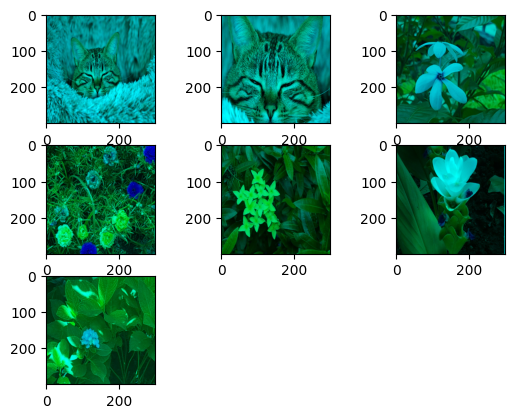

In [233]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np 
List=glob('./*jpg')
List

for cnt,i in enumerate(List):
    img=Image.open(i).resize((300,300))
    img=np.array(img)
    print(img.shape)
    img[:,:,0]=0

    plt.subplot(3,3,cnt+1)
    plt.imshow(img)


one | two | three
--- | --- | ---

밑은 동적 시각화 bokeh 예제

In [234]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend
from bokeh.plotting import output_notebook

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

output_notebook()
p = figure(title='simple line ex', x_axis_label='x', y_axis_label='y')
line = p.line(x, y, line_width=2)

legend = Legend(items=[("Temp.", [line])])
p.add_layout(legend)

show(p)


Loading BokehJS ...

### 파이썬 Comprehension



In [238]:
data=[]
for i in range(9):
    data.append(i)
data

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [239]:
data=[i for i in range(9)]  ## 권장사항
data 

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [248]:
food1=['쌈밥','치킨','피자']
food2=['사과', '아이스크림', '커피']
data=[]
for x1 in food1:
    print('▶메뉴는',x1)
    for x2 in food2:
        print('후식은',x2)
        data.append((x1,x2))
data

▶메뉴는 쌈밥
후식은 사과
후식은 아이스크림
후식은 커피
▶메뉴는 치킨
후식은 사과
후식은 아이스크림
후식은 커피
▶메뉴는 피자
후식은 사과
후식은 아이스크림
후식은 커피


[('쌈밥', '사과'),
 ('쌈밥', '아이스크림'),
 ('쌈밥', '커피'),
 ('치킨', '사과'),
 ('치킨', '아이스크림'),
 ('치킨', '커피'),
 ('피자', '사과'),
 ('피자', '아이스크림'),
 ('피자', '커피')]

In [249]:
[(x,y) for x in ['쌈밥','치킨','피자'] for y in ['사과', '아이스크림', '커피']]

[('쌈밥', '사과'),
 ('쌈밥', '아이스크림'),
 ('쌈밥', '커피'),
 ('치킨', '사과'),
 ('치킨', '아이스크림'),
 ('치킨', '커피'),
 ('피자', '사과'),
 ('피자', '아이스크림'),
 ('피자', '커피')]

In [259]:
#### 책 많이읽기
### 프롬프트/AI 엔지니어
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
txt=["The only way to do great work is to love what you do", 
"Believe you can and you're halfway there", 
"In the middle of every difficulty lies opportunity",
 "The future belongs to those who believe in the beauty of their dreams", 
 "Happiness is not something ready made. It comes from your own actions", 
 "Success is not final, failure is not fatal: It is the courage to continue that counts", 
 "The only limit to our realization of tomorrow will be our doubts of today"]

tmp=[i.split(' ') for i in txt]
tmp



[['The',
  'only',
  'way',
  'to',
  'do',
  'great',
  'work',
  'is',
  'to',
  'love',
  'what',
  'you',
  'do'],
 ['Believe', 'you', 'can', 'and', "you're", 'halfway', 'there'],
 ['In', 'the', 'middle', 'of', 'every', 'difficulty', 'lies', 'opportunity'],
 ['The',
  'future',
  'belongs',
  'to',
  'those',
  'who',
  'believe',
  'in',
  'the',
  'beauty',
  'of',
  'their',
  'dreams'],
 ['Happiness',
  'is',
  'not',
  'something',
  'ready',
  'made.',
  'It',
  'comes',
  'from',
  'your',
  'own',
  'actions'],
 ['Success',
  'is',
  'not',
  'final,',
  'failure',
  'is',
  'not',
  'fatal:',
  'It',
  'is',
  'the',
  'courage',
  'to',
  'continue',
  'that',
  'counts'],
 ['The',
  'only',
  'limit',
  'to',
  'our',
  'realization',
  'of',
  'tomorrow',
  'will',
  'be',
  'our',
  'doubts',
  'of',
  'today']]

In [262]:
# !pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
     ---- ----------------------------------- 0.2/1.5 MB 2.0 MB/s eta 0:00:01
     -------------- ------------------------- 0.6/1.5 MB 4.3 MB/s eta 0:00:01
     ----------------- ---------------------- 0.7/1.5 MB 4.3 MB/s eta 0:00:01
     ------------------- -------------------- 0.7/1.5 MB 3.1 MB/s eta 0:00:01
     ------------------------------ --------- 1.2/1.5 MB 4.3 MB/s eta 0:00:01
     ------------------------------ --------- 1.2/1.5 MB 4.3 MB/s eta 0:00:01
     ------------------------------------- -- 1.4/1.5 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 3.7 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:

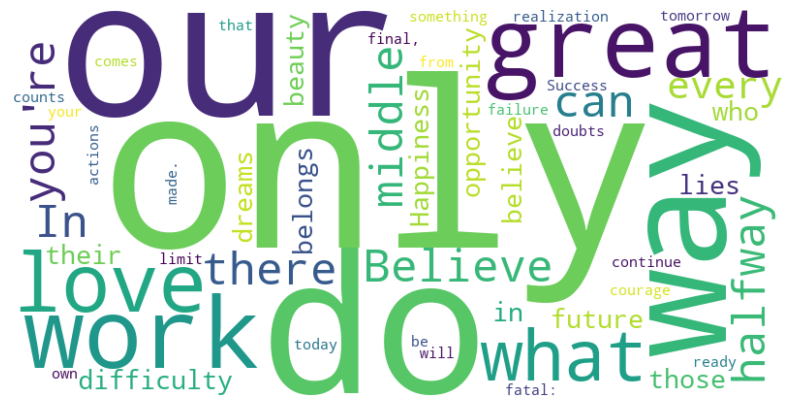

In [282]:
import nltk
from nltk.corpus import stopwords


words=[word for line in txt for word in line.split()]

stop_words = ['and','is','The','to','the','of','It','it','you','not']
# print(stop_words)
# 불용어 제거
filtered_words = [word for word in words if word.lower() not in stop_words]
freq=Counter(filtered_words)

wordcloud= WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(freq)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

- 문자열 -> 어디서 가져올것인가 크롤링 or 파일 or API 연동
    - 문자열 리스트인 경우 for문으로 돌리기
   
- 문자열의 space 기준으로 word화 (단어화 토큰화) 
- 글자수가 0,1,2 인 단어제거 -> 글자수가 3글자 이상은 dataList에 추가
                                    
                                    
                                    
                                    (원본데이터 삭제는 X)